In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv(r'C:\Users\seba_\Desktop\DELL_PULPIT\Magisterka\sem3\MiAML\ensemble_Learning\adult.data.csv',
                 sep=';')

<B>Age</B> - <font size =3>Wiek</font>

<B>Workclass</B> - <font size =3>Typ Klasy robotniczej (samozatrudniony, przedsiębiorstwo prywatne)</font>

<B>fnlwgt</B> - <font size =3>Waga końcona</font>

<B>education-num</B> - <font size =3>Wykształcenie: (Licencjat, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Przedszkole )</font>

<B>marital-status</B> - <font size =3>Stan cywilny: (Żonaty-małżonek cywilny, Rozwiedziony, Nigdy nie żonaty, W separacji, Wdowiec, Żonaty-małżonek-nieobecny, Żonaty-AF-małżonek)</font>

<B>occupation</B> - <font size =3>Zawód: (wsparcie techniczne, naprawa rzemieślnicza, inne usługi, sprzedaż, kierownik wykonawczy, specjalność prof., sprzątacze, inspektor maszyn, adm-biurowy, rolnictwo-rybołówstwo, transport-przeprowadzki, dom prywatny -serwis, służba ochronna, siły zbrojne)</font>

<B>relationship</B> - <font size =3>Związek:(Żona, Własne dziecko, Mąż, Poza rodziną, Inny krewny, Stan wolny)</font>

<B>race</B> - <font size =3>Rasa: (Biała, Azjatka-Pac-Islander, Amer-Indian-Eskimo, Inna, Czarna)</font>

<B>sex</B> - <font size =3>Płeć: (mężczyzna, kobieta)</font>

<B>capital-gain</B> - <font size =3>Wysokość pozyskanego kapitału</font>

<B>capital-loss</B> - <font size =3>Kwota utraconego kapitału</font>

<B>hours-per-week</B>- <font size =3>Liczba godzin przepracowanych w tygodniu</font>

<B>native-country</B> - <font size =3>Kraj ojczysty</font>

<B>income</B> - <font size =3>Zmienna docelowa</font>

<font size = 2>Wagi w plikach CPS są kontrolowane zgodnie z niezależnymi szacunkami cywilnej populacji nieinstytucjonalnej w USA. Są one przygotowywane dla nas co miesiąc przez Wydział Ludności Biura Spisu Ludności. Używamy 3 zestawów kontrolek.

<font size = 2>To są:</font>


<font size = 2>
    <li>Pojedyncza komórka szacunkowa populacji w wieku 16+ dla każdego stanu.</li>
    <li>Kontrole pochodzenia latynoskiego według wieku i płci.</li>
<li>Kontrole według rasy, wieku i płci.</font></li>


<font size = 2>W naszym programie do ważenia używamy wszystkich trzech zestawów kontroli i „przerabiamy” je 6 razy, aby na koniec wrócić do wszystkich kontroli, z których korzystaliśmy.</font>

<font size = 2>Termin oszacowanie odnosi się do sumy populacji uzyskanej z CPS poprzez utworzenie „ważonych zestawień” dowolnych określonych społeczno-ekonomicznych cech populacji.</font>

<font size = 2>Osoby o podobnych cechach demograficznych powinny mieć podobne wagi. 
W związku z tym stwierdzeniem należy pamiętać o jednym ważnym zastrzeżeniu. 
Oznacza to, że ponieważ próbka CPS jest w rzeczywistości zbiorem 51 próbek stanu, z których każda ma własne prawdopodobieństwo wyboru, stwierdzenie ma zastosowanie tylko w obrębie stanu.</font>

<h3> Źródlo danych :</h3> https://code.datasciencedojo.com/datasciencedojo/datasets/blob/master/Census%20Income/README.md

In [82]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,"?,",304873,"10th,",6,"Never-married,","?,","Own-child,","White,","Female,",34095,0,32,"United-States,",<=50K
1,17,"Private,",65368,"11th,",7,"Never-married,","Sales,","Own-child,","White,","Female,",0,0,12,"United-States,",<=50K
2,17,"Private,",245918,"11th,",7,"Never-married,","Other-service,","Own-child,","White,","Male,",0,0,12,"United-States,",<=50K
3,17,"Private,",191260,"9th,",5,"Never-married,","Other-service,","Own-child,","White,","Male,",1055,0,24,"United-States,",<=50K
4,17,"Private,",270942,"5th-6th,",3,"Never-married,","Other-service,","Other-relative,","White,","Male,",0,0,48,"Mexico,",<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,90,"Local-gov,",188242,"HS-grad,",9,"Never-married,","Craft-repair,","Own-child,","White,","Male,",11678,0,40,"United-States,",>50K.
48838,90,"?,",50746,"10th,",6,"Divorced,","?,","Not-in-family,","White,","Female,",0,0,7,"United-States,",<=50K.
48839,90,"Private,",347074,"Some-college,",10,"Never-married,","Adm-clerical,","Own-child,","White,","Female,",0,1944,12,"United-States,",<=50K.
48840,90,"Private,",272752,"Some-college,",10,"Never-married,","Other-service,","Own-child,","White,","Male,",0,0,10,"United-States,",<=50K.


In [83]:
df_copy = df.copy()

In [84]:
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,"?,",304873,"10th,",6,"Never-married,","?,","Own-child,","White,","Female,",34095,0,32,"United-States,",<=50K
1,17,"Private,",65368,"11th,",7,"Never-married,","Sales,","Own-child,","White,","Female,",0,0,12,"United-States,",<=50K
2,17,"Private,",245918,"11th,",7,"Never-married,","Other-service,","Own-child,","White,","Male,",0,0,12,"United-States,",<=50K
3,17,"Private,",191260,"9th,",5,"Never-married,","Other-service,","Own-child,","White,","Male,",1055,0,24,"United-States,",<=50K
4,17,"Private,",270942,"5th-6th,",3,"Never-married,","Other-service,","Other-relative,","White,","Male,",0,0,48,"Mexico,",<=50K


In [85]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [86]:
df_copy['workclass'].value_counts()

Private,             33906
Self-emp-not-inc,     3862
Local-gov,            3136
?,                    2799
State-gov,            1981
Self-emp-inc,         1695
Federal-gov,          1432
Without-pay,            21
Never-worked,           10
Name: workclass, dtype: int64

In [87]:
df_copy['workclass'].replace({'Private,':'Private',
                              'Self-emp-not-inc,':'Self_Employed_No_Income',
                              'Local-gov,':'Local_Government',
                              '?,':'Nodate',
                              'State-gov,':'State_Government',
                              'Self-emp-inc,':'Self_Employed_Income',
                              'Federal-gov,':'Federal_Government',
                              'Without-pay,':'Without_Payment',
                              'Never-worked,':'Never_Worked'}, inplace = True)

In [88]:
df_copy['education'].value_counts()

HS-grad,         15784
Some-college,    10878
Bachelors,        8025
Masters,          2657
Assoc-voc,        2061
11th,             1812
Assoc-acdm,       1601
10th,             1389
7th-8th,           955
Prof-school,       834
9th,               756
12th,              657
Doctorate,         594
5th-6th,           509
1st-4th,           247
Preschool,          83
Name: education, dtype: int64

In [89]:
df_copy['education'].replace({'1st-4th,,':'Elementary_School',
                              '5th-6th,':'Middle_School',
                              '12th,':'High_School_Senior_Year',
                              '9th,':'High_School_Freshman_Year',
                              '7th-8th,':'Middle_School',
                              '10th,':'High_School_Sophomore_Year',
                              '11th,':'High_School_Junior_Year',
                              'Preschool,':'Preschool',
                              'Doctorate,':'Doctorate',
                             'Prof-school,':'Professional_School',
                             'Assoc-acdm,':'Associate',
                             'Assoc-voc,':'Associate',
                             'Some-college,':'Bachelors',
                             'Bachelors,':'Bachelors',
                             'HS-grad,':'High_School_Graduate'}, inplace = True)

In [90]:
df_copy['marital-status'].value_counts()

Married-civ-spouse,       22379
Never-married,            16117
Divorced,                  6633
Separated,                 1530
Widowed,                   1518
Married-spouse-absent,      628
Married-AF-spouse,           37
Name: marital-status, dtype: int64

In [91]:
df_copy['marital-status'].replace({'Married-civ-spouse,':'Married_Civil_Spouse,',
                              'Never-married,':'Never_Married',
                              'Divorced,':'Divorced',
                              'Separated,':'Separated',
                              'Widowed,':'Widowed',
                              'Married-spouse-absent,':'Married_Spouse_Absent',
                              'Married-AF-spouse,':'Married_ArmedForces_Spouse',
                                    }, inplace = True)

In [92]:
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,Nodate,304873,High_School_Sophomore_Year,6,Never_Married,"?,","Own-child,","White,","Female,",34095,0,32,"United-States,",<=50K
1,17,Private,65368,High_School_Junior_Year,7,Never_Married,"Sales,","Own-child,","White,","Female,",0,0,12,"United-States,",<=50K
2,17,Private,245918,High_School_Junior_Year,7,Never_Married,"Other-service,","Own-child,","White,","Male,",0,0,12,"United-States,",<=50K
3,17,Private,191260,High_School_Freshman_Year,5,Never_Married,"Other-service,","Own-child,","White,","Male,",1055,0,24,"United-States,",<=50K
4,17,Private,270942,Middle_School,3,Never_Married,"Other-service,","Other-relative,","White,","Male,",0,0,48,"Mexico,",<=50K


In [93]:
df_copy['occupation'].value_counts()

Prof-specialty,       6172
Craft-repair,         6112
Exec-managerial,      6086
Adm-clerical,         5611
Sales,                5504
Other-service,        4923
Machine-op-inspct,    3022
?,                    2809
Transport-moving,     2355
Handlers-cleaners,    2072
Farming-fishing,      1490
Tech-support,         1446
Protective-serv,       983
Priv-house-serv,       242
Armed-Forces,           15
Name: occupation, dtype: int64

In [94]:
df_copy['occupation'].replace({'Prof-specialty,':'Professional_Specialty',
                              'Craft-repair,':'Craft_Repair',
                              'Exec-managerial,':'Executive_Manager',
                              'Adm-clerical,':'Administrative_Clerk',
                              'Sales,':'Sales',
                              'Other-service,':'Other_Service',
                              'Machine-op-inspct,':'Machine_Operator_Inspector',
                               '?,':'Nodate',
                               'Transport-moving,':'Transport_Moving',
                               'Handlers-cleaners,':'Handlers_Cleaners',
                               'Farming-fishing,':'Farming_Fishing',
                               'Tech-support,':'Tech_Support',
                               'Protective-serv,':'Protective_Services',
                               'Priv-house-serv,':'Private_House_Services',
                               'Armed-Forces,':'Armed_Forces'
                                    }, inplace = True)

In [95]:
df_copy['relationship'].value_counts()

Husband,           19716
Not-in-family,     12583
Own-child,          7581
Unmarried,          5125
Wife,               2331
Other-relative,     1506
Name: relationship, dtype: int64

In [96]:
df_copy['relationship'].replace({'Husband,':'Husband',
                              'Not-in-family,':'Not_in_Family',
                              'Own-child,':'Own_Child',
                              'Unmarried,':'Unmarried',
                              'Wife,':'Wife',
                              'Other-relative,':'Other_Relative'
                                    }, inplace = True)

In [97]:
df_copy['race'].value_counts()

White,                 41762
Black,                  4685
Asian-Pac-Islander,     1519
Amer-Indian-Eskimo,      470
Other,                   406
Name: race, dtype: int64

In [98]:
df_copy['race'].replace({'White,':'White',
                              'Black,':'Black',
                              'Asian-Pac-Islander,':'Asian_Panvbcific_Islander',
                              'Amer-Indian-Eskimo,':'Amer_Indian_Eskimo',
                              'Other,':'Other'
                                    }, inplace = True)

In [99]:
df_copy['sex'].replace({'Male,':'Male',
                              'Female,':'Female'
                                    }, inplace = True)

In [100]:
df_copy['native-country'].value_counts()

United-States,                 43832
Mexico,                          951
?,                               857
Philippines,                     295
Germany,                         206
Puerto-Rico,                     184
Canada,                          182
El-Salvador,                     155
India,                           151
Cuba,                            138
England,                         127
China,                           122
South,                           115
Jamaica,                         106
Italy,                           105
Dominican-Republic,              103
Japan,                            92
Guatemala,                        88
Poland,                           87
Vietnam,                          86
Columbia,                         85
Haiti,                            75
Portugal,                         67
Taiwan,                           65
Iran,                             59
Greece,                           49
Nicaragua,                        49
P

In [101]:
df_copy['native-country'].replace({'United-States,':'United_States','Mexico,':'Mexico','?,':'Nodata','Philippines,':'Philippines',
                        'Germany,':'Germany','Puerto-Rico,':'Puerto_Rico','Canada,':'Canada','El-Salvador,':'El_Salvador',
                        'India,':'India','Cuba,':'Cuba','England,':'England','China,':'China',
                        'South,':'South_Africa','Jamaica,':'Jamaica','Italy,':'Italy','Dominican-Republic,':'Dominican_Republic',
                        'Japan,':'Japan','Guatemala,':'Guatemala','Poland,':'Poland','Vietnam,':'Vietnam',
                        'Columbia,':'Columbia','Haiti,':'Haiti','Portugal,':'Portugal','Taiwan,':'Taiwan',
                        'Iran,':'Iran','Greece,':'Greece','Nicaragua,':'Nicaragua','Peru,':'Peru',
                        'Ecuador,':'Ecuador','Ecuador,':'Ecuador','Ireland,':'Ireland','Thailand,':'Thailand',
                        'Hong,':'Hong_Kong','Cambodia,':'Cambodia','Trinadad&Tobago,':'Trinadad_And_Tobago','Yugoslavia,':'Yugoslavia',
                        'Outlying-US(Guam-USVI-etc),':'Outlying_US_Guam_etc)','Laos,':'Laos','Scotland,':'Scotland','Thailand,':'Thailand',
                        'Honduras,':'Honduras','Hungary,':'Hungary','Holand-Netherlands,':'Netherlands'
                                    }, inplace = True)

In [102]:
df_copy['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [103]:
df_copy['income'].replace({'<=50K':'0',
                           '<=50K.':'0',
                           '>50K':'1',
                           '>50K.':'1'
                            }, inplace = True)

In [104]:
df_copy['income'] = df_copy['income'].astype(str).astype(int)

In [105]:
df_model = df_copy.copy()

In [106]:
df_model.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,Nodate,304873,High_School_Sophomore_Year,6,Never_Married,Nodate,Own_Child,White,Female,34095,0,32,United_States,0
1,17,Private,65368,High_School_Junior_Year,7,Never_Married,Sales,Own_Child,White,Female,0,0,12,United_States,0
2,17,Private,245918,High_School_Junior_Year,7,Never_Married,Other_Service,Own_Child,White,Male,0,0,12,United_States,0
3,17,Private,191260,High_School_Freshman_Year,5,Never_Married,Other_Service,Own_Child,White,Male,1055,0,24,United_States,0
4,17,Private,270942,Middle_School,3,Never_Married,Other_Service,Other_Relative,White,Male,0,0,48,Mexico,0


## Statystyka - start

C:\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


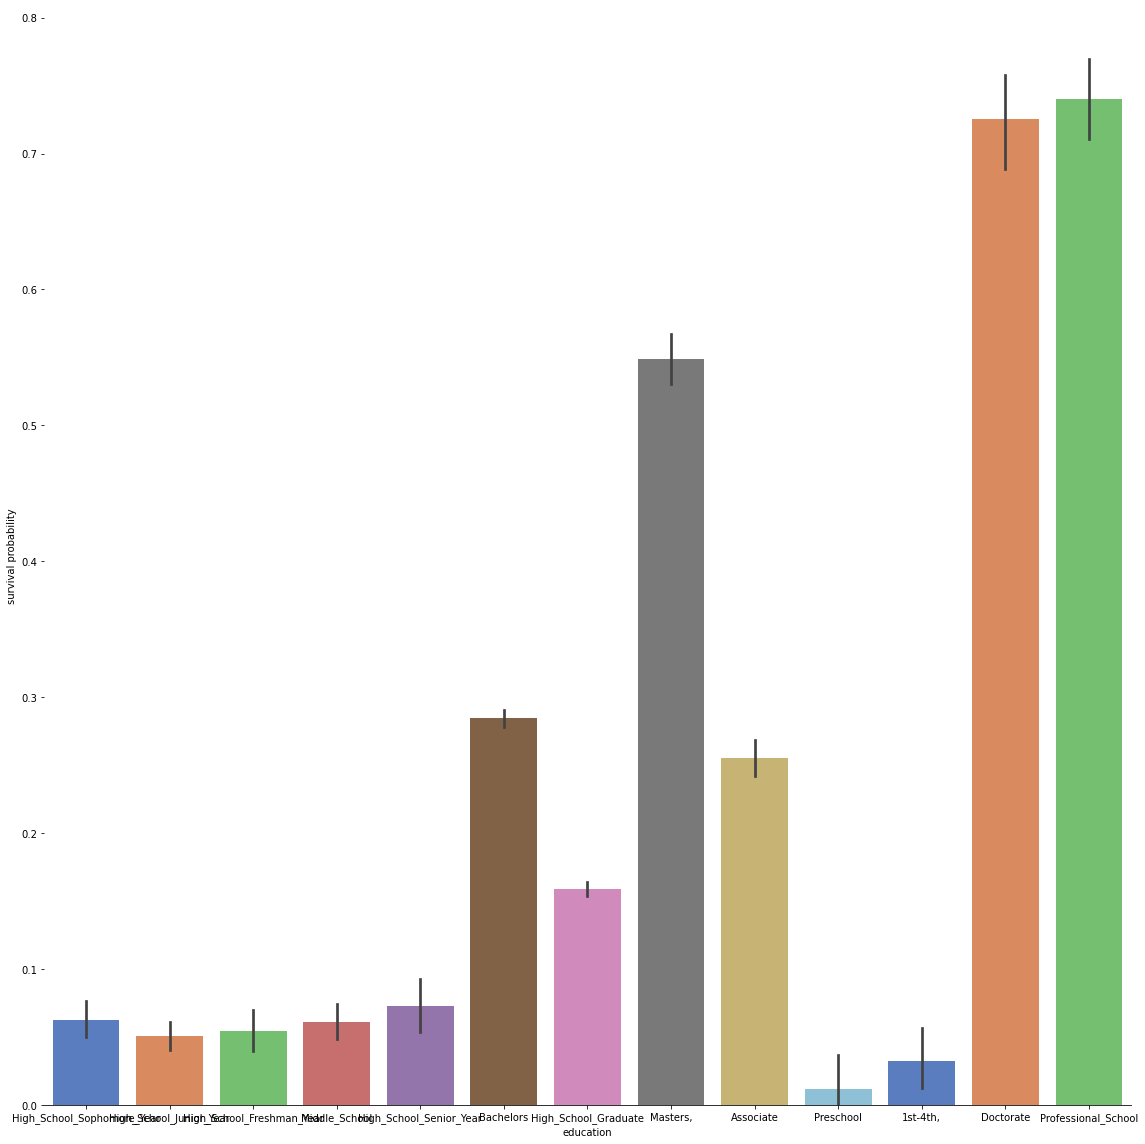

In [109]:
g = sns.factorplot(x="education",y="income",data=df_model,kind="bar", size = 16 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

C:\AnacondaNavigator\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\AnacondaNavigator\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 2520x1800 with 0 Axes>

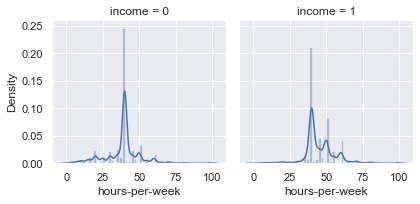

In [121]:
plt.figure(figsize=(35,25))

g = sns.FacetGrid(df_model, col='income')
g = g.map(sns.distplot, "hours-per-week")

C:\AnacondaNavigator\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


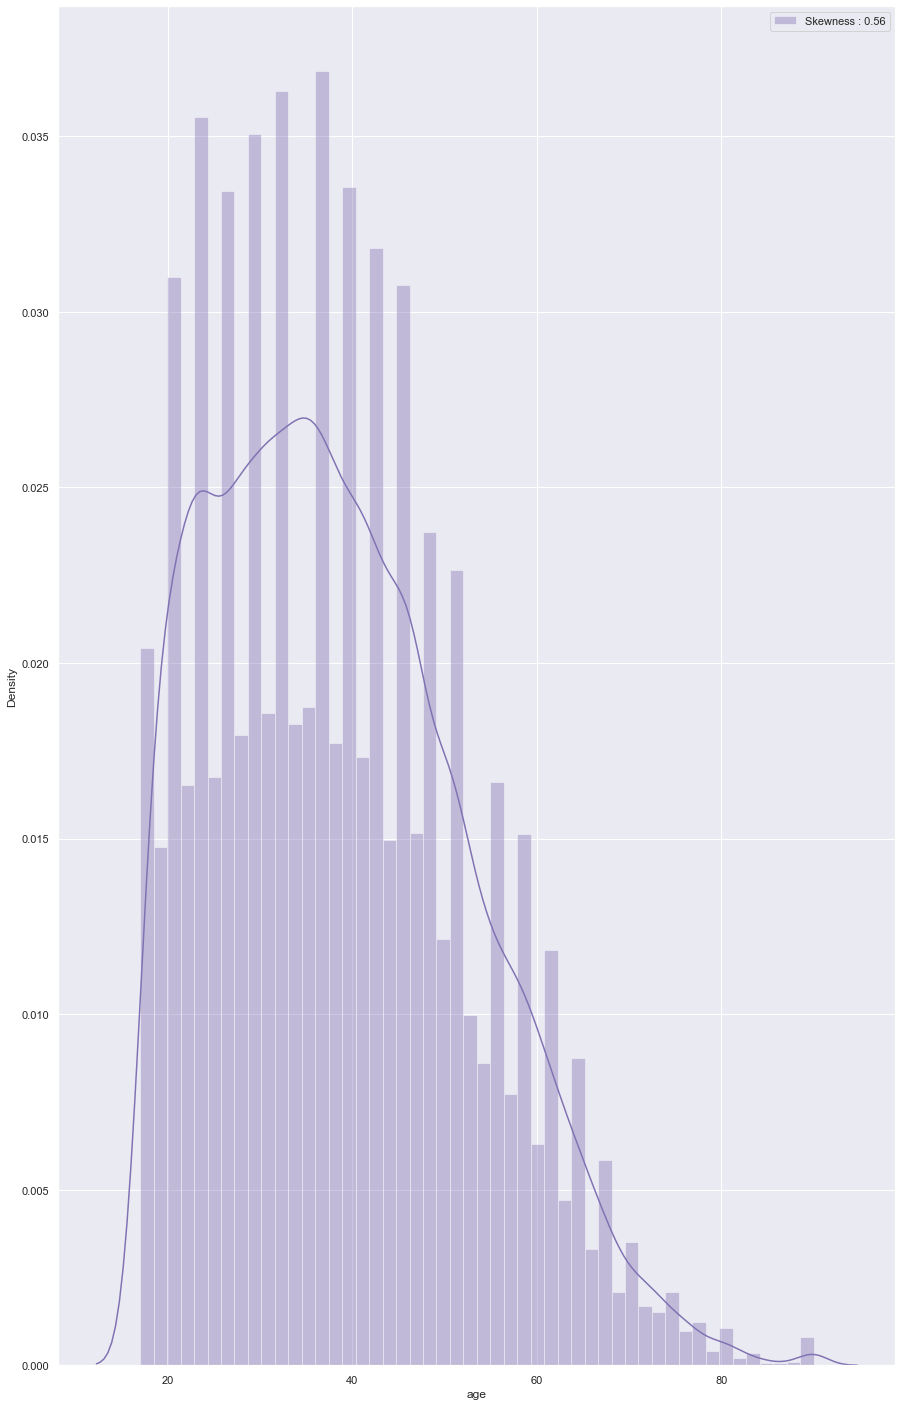

In [139]:
plt.figure(figsize=(15,25))
g = sns.distplot(df_model["age"], color="m", label="Skewness : %.2f"%(df_model["age"].skew()))
g = g.legend(loc="best")

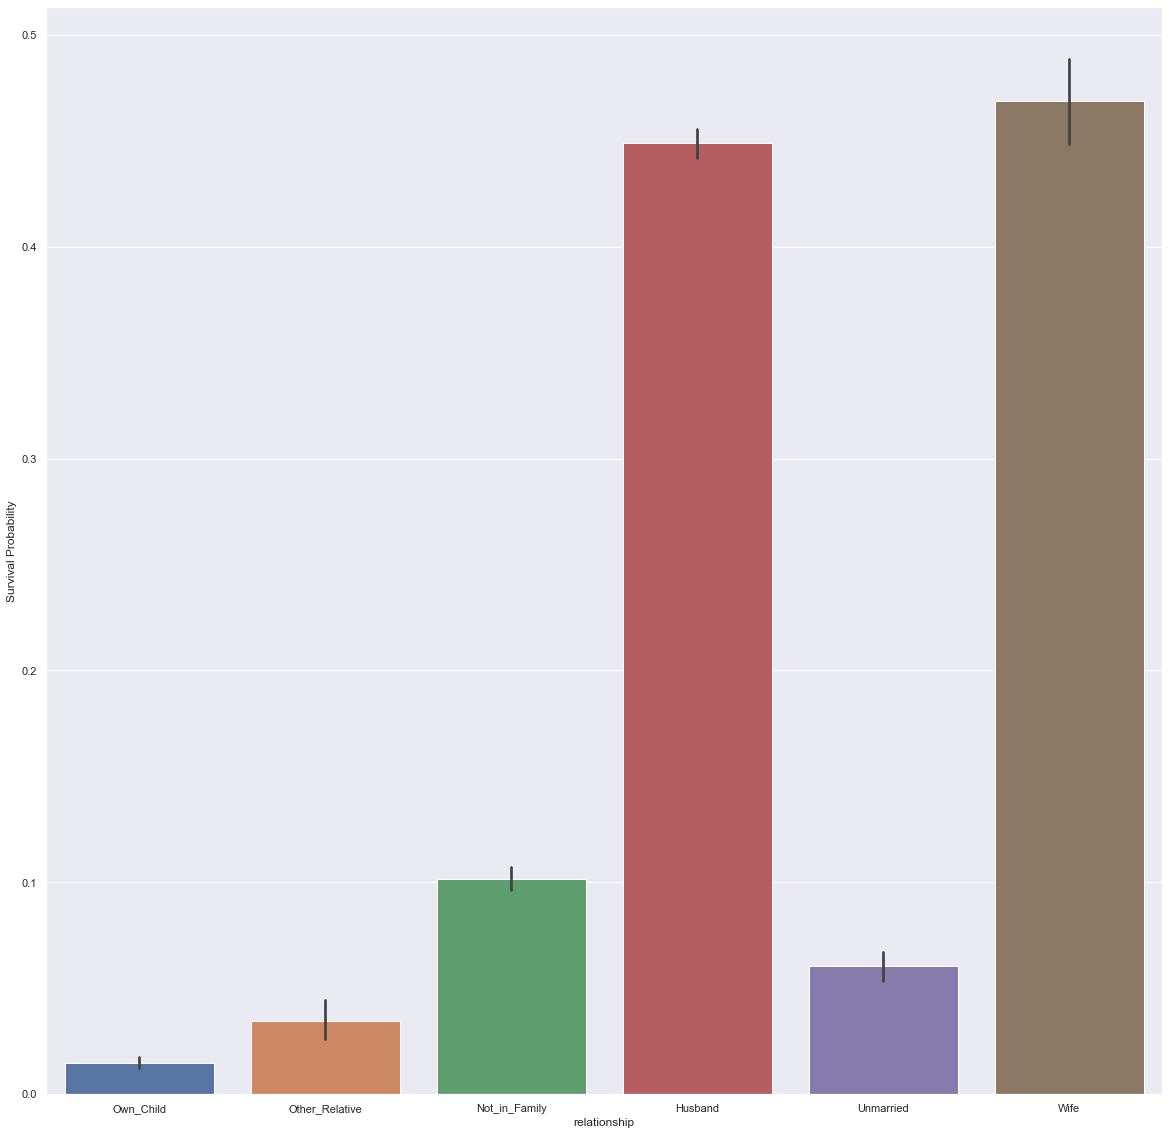

In [158]:
plt.figure(figsize=(20,20))
g = sns.barplot(x="relationship",y="income",data=df_model)
g = g.set_ylabel("Survival Probability")

C:\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x720 with 0 Axes>

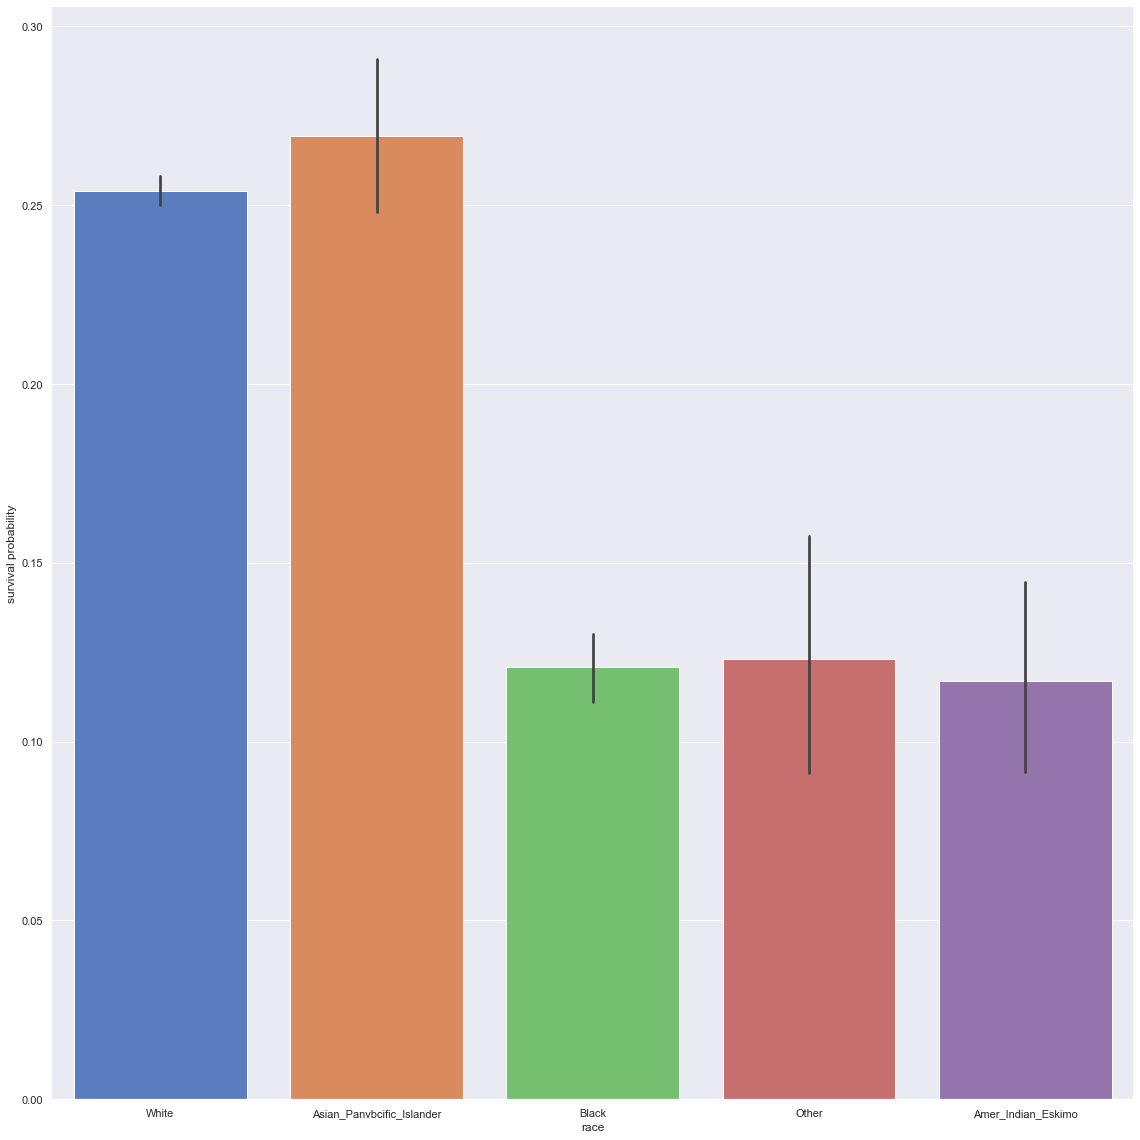

In [169]:
plt.figure(figsize=(15,10))
g = sns.factorplot(x="race",y="income",data=df_model,kind="bar", size = 16 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

C:\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


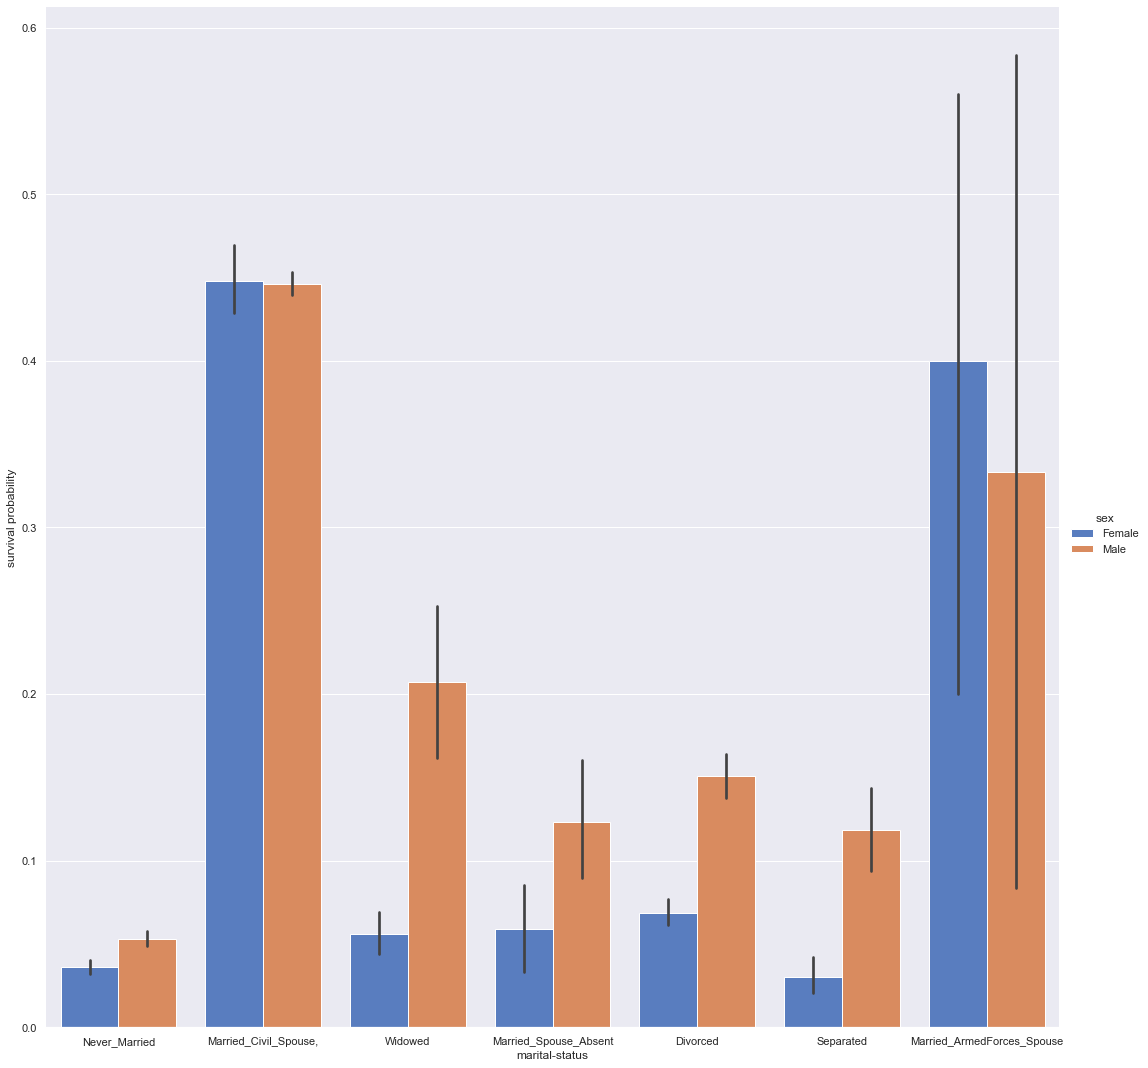

In [177]:
g = sns.factorplot(x="marital-status", y="income", hue="sex", data=df_model,
                   size=15, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

C:\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\AnacondaNavigator\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update

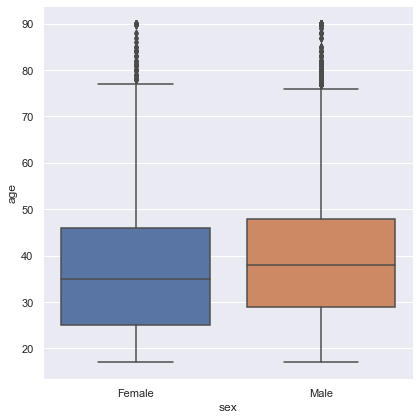

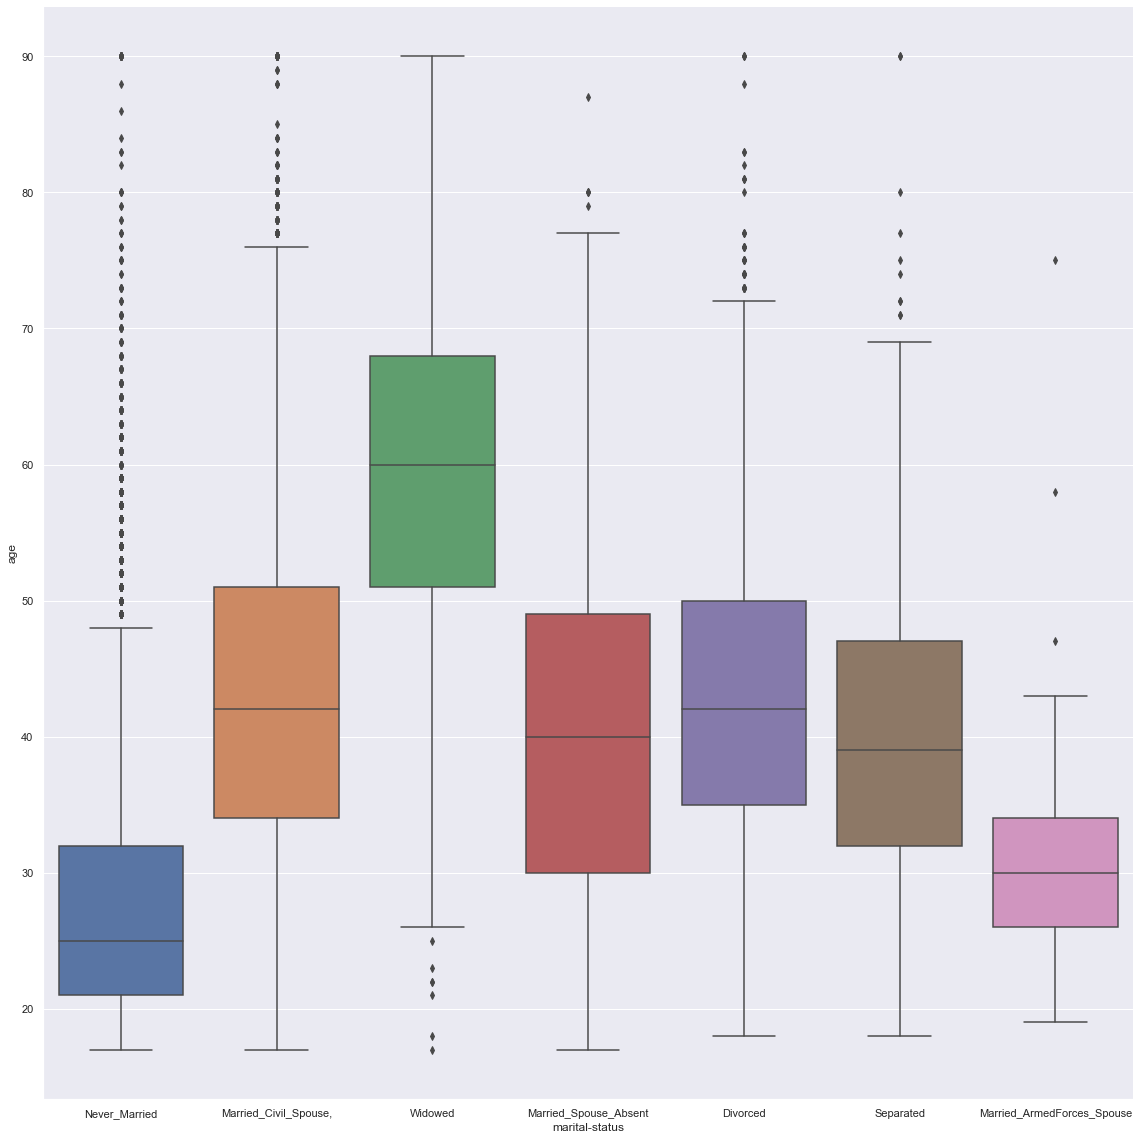

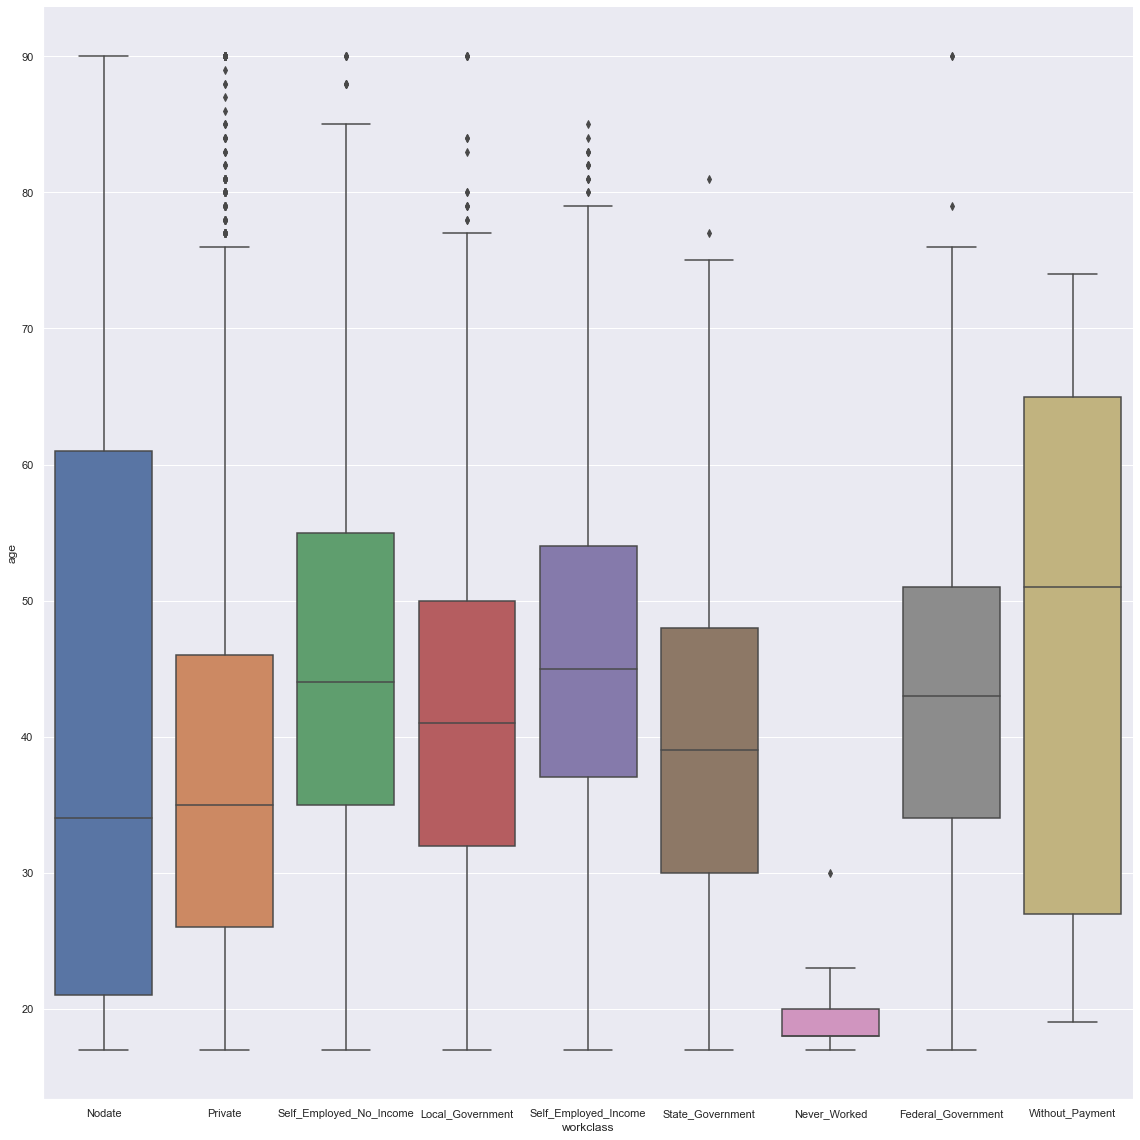

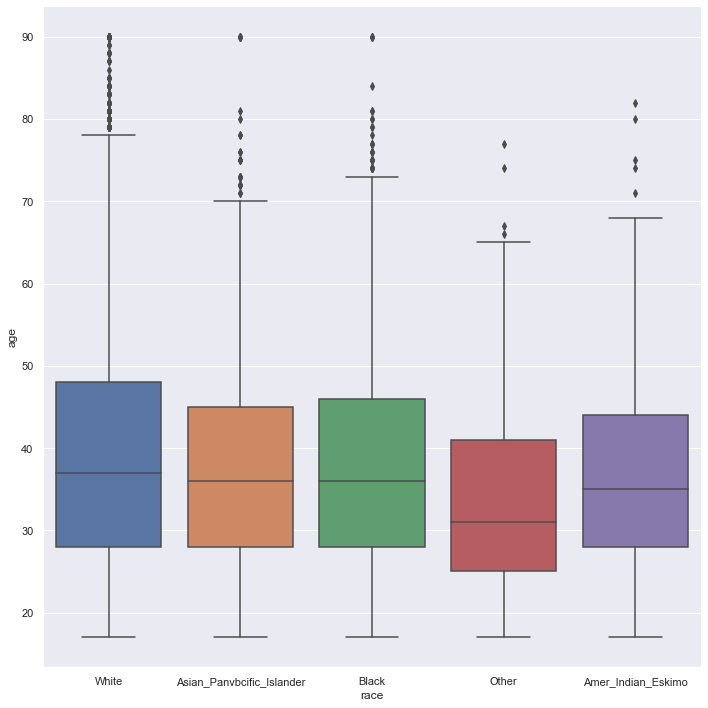

In [198]:
g = sns.factorplot(y="age",x="sex",data=df_model,size=6,kind="box")
g = sns.factorplot(y="age",x="marital-status", data=df_model,size=16,kind="box")
g = sns.factorplot(y="age",x="workclass", data=df_model,size=16,kind="box")
g = sns.factorplot(y="age",x="race", data=df_model,size=10,kind="box")

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
## Zamiana wartości string na etykiety int 

obj_cols = ['workclass', 'education', 'marital-status','occupation','relationship',
            'race','sex','native-country']

lb = LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of columns:{i}")
    print(df_model.loc[:,i].value_counts())
    df_model[i] = lb.fit_transform(df_model[i])
    print('The classes which labeled from 0 are:',lb.classes_, end="\n")

Value Counts of columns:workclass
Private                    33906
Self_Employed_No_Income     3862
Local_Government            3136
Nodate                      2799
State_Government            1981
Self_Employed_Income        1695
Federal_Government          1432
Without_Payment               21
Never_Worked                  10
Name: workclass, dtype: int64
The classes which labeled from 0 are: ['Federal_Government' 'Local_Government' 'Never_Worked' 'Nodate' 'Private'
 'Self_Employed_Income' 'Self_Employed_No_Income' 'State_Government'
 'Without_Payment']
Value Counts of columns:education
Bachelors                     18903
High_School_Graduate          15784
Associate                      3662
Masters,                       2657
High_School_Junior_Year        1812
Middle_School                  1464
High_School_Sophomore_Year     1389
Professional_School             834
High_School_Freshman_Year       756
High_School_Senior_Year         657
Doctorate                       594
1st-4th

In [30]:
df_model.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,3,304873,8,6,4,7,3,4,0,34095,0,32,39,0
1,17,4,65368,6,7,4,12,3,4,0,0,0,12,39,0
2,17,4,245918,6,7,4,8,3,4,1,0,0,12,39,0
3,17,4,191260,4,5,4,8,3,4,1,1055,0,24,39,0
4,17,4,270942,10,3,4,8,2,4,1,0,0,48,24,0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Dzielenie zbioru na zbior testowy i treningowy
np.random.seed(0)
df_train, df_test = train_test_split(df_model, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
#konwertowanie kolumn liczbowych na liczy mieszczące się w przedziale -1, 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['fnlwgt', 'capital-gain', 'hours-per-week', 'native-country', 'age']
df_model[num_vars] = scaler.fit_transform(df_model[num_vars])

In [34]:
df_model.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.0,3,0.197947,8,6,4,7,3,4,0,0.340953,0,0.316327,0.951220,0
1,0.0,4,0.035913,6,7,4,12,3,4,0,0.000000,0,0.112245,0.951220,0
2,0.0,4,0.158061,6,7,4,8,3,4,1,0.000000,0,0.112245,0.951220,0
3,0.0,4,0.121083,4,5,4,8,3,4,1,0.010550,0,0.234694,0.951220,0
4,0.0,4,0.174991,10,3,4,8,2,4,1,0.000000,0,0.479592,0.585366,0


In [35]:
df_model.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,3.948630,0.120004,4.120450,10.078089,2.618750,6.480550,1.443287,3.668052,0.668482,0.010791,87.502314,0.402269,0.905551,0.239282
std,0.187815,1.351072,0.071445,2.639015,2.570973,1.507703,4.338737,1.602151,0.845986,0.470764,0.074521,403.004552,0.126443,0.157796,0.426649
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,4.000000,0.071216,2.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.397959,0.951220,0.000000
50%,0.273973,4.000000,0.112210,5.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.397959,0.951220,0.000000
75%,0.424658,4.000000,0.152462,5.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.448980,0.951220,0.000000
max,1.000000,8.000000,1.000000,12.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,1.000000,4356.000000,1.000000,1.000000,1.000000


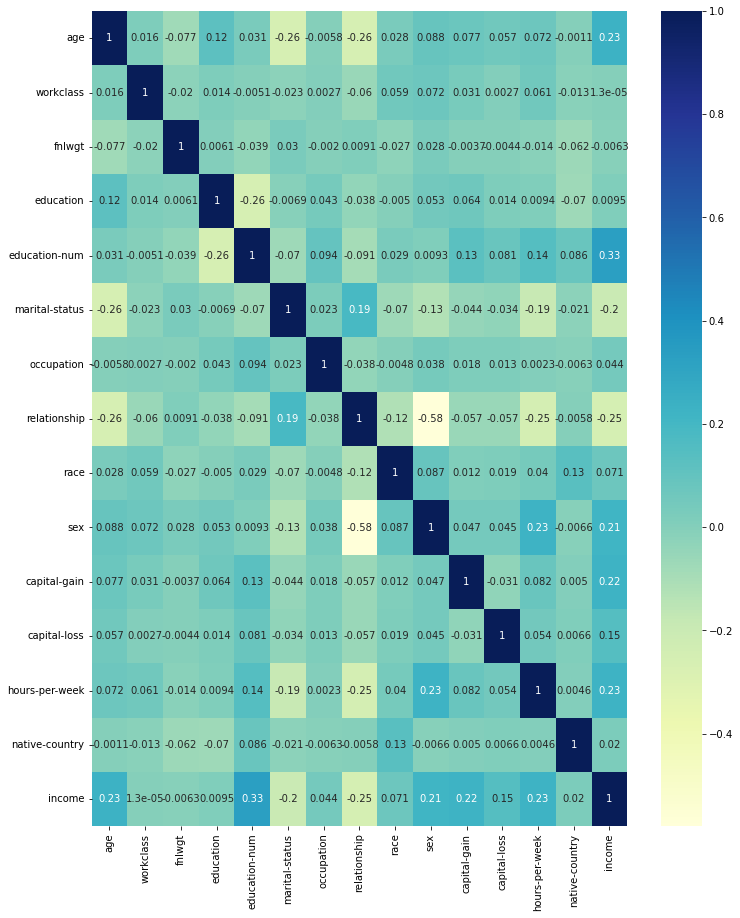

In [36]:
plt.figure(figsize = (12, 15))
sns.heatmap(df_model.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [37]:
y_train = df_train.pop('income')
x_train = df_train

In [38]:
y_test = df_test.pop('income')
x_test = df_test

## ENSEMBLE - PROCESS

<ul>
<li>SVC</li>
<li>Decision Tree</li>
<li>AdaBoost</li>
<li>Random Forest</li>
<li>Extra Trees</li>
<li>Gradient Boosting</li>
<li>Multiple layer perceprton (neural network)</li>
<li>KNN</li>
<li>Logistic regression</li>
<li>Linear Discriminant Analysis</li>
</ul>


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [40]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

C:\AnacondaNavigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


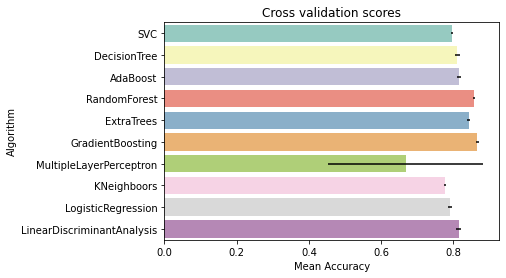

In [41]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", 
                                      cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [80]:
## Wybieramy: SVC, AdaBoost, RandomForest , ExtraTrees, GradientBoosting 

In [42]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsadaDTC.fit(x_train,y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [43]:
ExtC = ExtraTreesClassifier()

ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsExtC.fit(x_train,y_train)

ExtC_best = gsExtC.best_estimator_

gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8603646267519256

In [44]:
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8648104395787761

In [45]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsGBC.fit(x_train,y_train)

GBC_best = gsGBC.best_estimator_

gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


C:\AnacondaNavigator\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


0.870660214465989

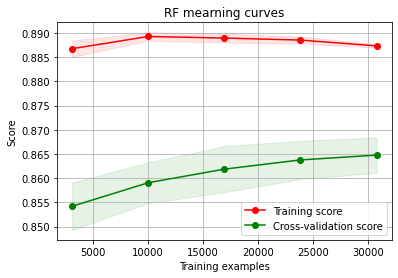

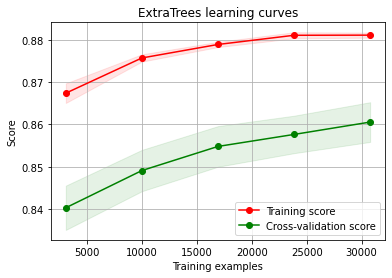

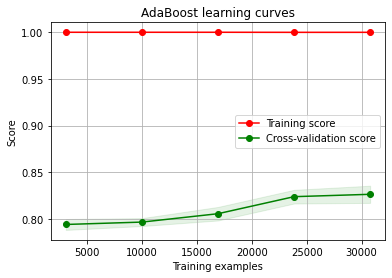

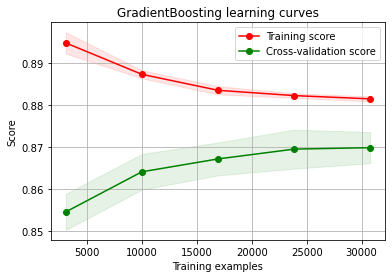

In [47]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"Random Forest curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",x_train,y_train,cv=kfold)

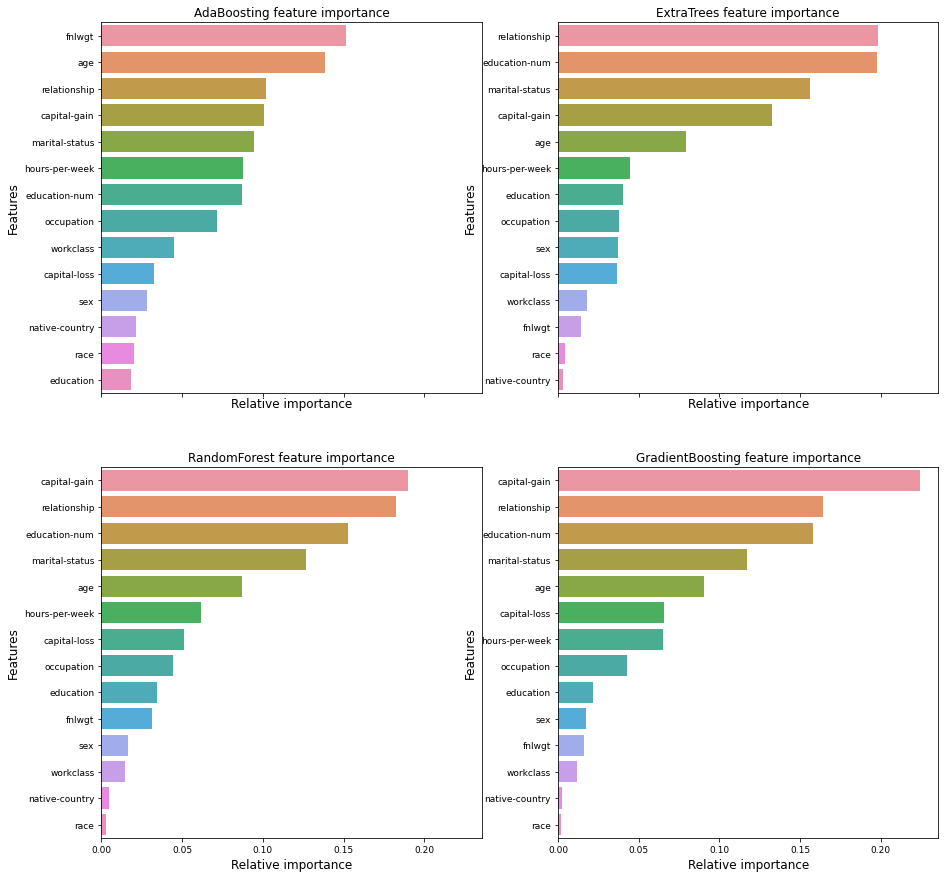

In [49]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=x_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

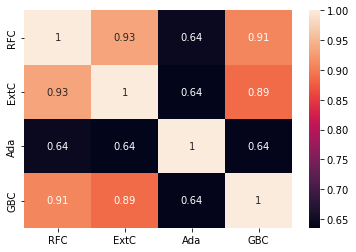

In [58]:
test_income_RFC = pd.Series(RFC_best.predict(x_test), name="RFC")
test_income_ExtC = pd.Series(ExtC_best.predict(x_test), name="ExtC")
test_income_AdaC = pd.Series(ada_best.predict(x_test), name="Ada")
test_income_GBC = pd.Series(GBC_best.predict(x_test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_income_RFC, test_income_ExtC, test_income_AdaC, test_income_GBC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [54]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
 ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(x_train, y_train)

In [75]:
test_income = pd.Series(votingC.predict(x_test), name="income")

results = pd.concat([df_model['income'],test_income],axis=1)
